In [1]:
using Pkg;
Pkg.activate("..")
Pkg.instantiate()
using ConstrainTNet

  Activating project at `~/Dropbox/Projects/GitHub_final/ConstrainTNet.jl`


## Cardinality 

Checking that the constrained tensor network can learn the cardinality dataset, that is, the dataset formed by all bitstrings of fixed cardinality. We initialize the mps with blocks of random entries. After training the mps should sample all bitstrings of fixed cardinality equally likely.

In [2]:
using Random
function ind2state(x::Int, len::Int)
    bs_ = bitstring(x)
    bs = collect(bs_[end-len+1:end])
    bs .== '1'
end

Random.seed!(1)
N = 8
m = 1
A = ones(Int, 1, N)
lb = [4] # lower bound
ub = [4] # upper bound
flux_mps = QRegion([Box(lb,ub)])

mps, link_inds_backward, link_inds_forward = constraints_to_mps(A, lb, ub; verbose=false, flux_center=1, block_dim=1, ensemble_entries="random")
normalize!(mps)
constrained_orthogonalize!(mps, 1; left_canonical_indices=link_inds_forward, right_canonical_indices=link_inds_backward,flux_mps=flux_mps)
mps_ini = copy(mps);

is = ((dim=2|id=313) <In>
 1: QN("q1",0) => 1
 2: QN("q1",1) => 1, (dim=3|id=349) <In>
 1: QRegion([Box([2], [2])]) => 1
 2: QRegion([Box([3], [3])]) => 1
 3: QRegion([Box([4], [4])]) => 1, (dim=2|id=243) <Out>
 1: QRegion([Box([3], [3])]) => 1
 2: QRegion([Box([4], [4])]) => 1)
is = ((dim=2|id=364) <In>
 1: QN("q1",0) => 1
 2: QN("q1",1) => 1, (dim=4|id=479) <In>
 1: QRegion([Box([1], [1])]) => 1
 2: QRegion([Box([2], [2])]) => 1
 3: QRegion([Box([3], [3])]) => 1
 4: QRegion([Box([4], [4])]) => 1, (dim=3|id=349) <Out>
 1: QRegion([Box([2], [2])]) => 1
 2: QRegion([Box([3], [3])]) => 1
 3: QRegion([Box([4], [4])]) => 1)
is = ((dim=2|id=71) <In>
 1: QN("q1",0) => 1
 2: QN("q1",1) => 1, (dim=5|id=33) <In>
 1: QRegion([Box([0], [0])]) => 1
 2: QRegion([Box([1], [1])]) => 1
 3: QRegion([Box([2], [2])]) => 1
 4: QRegion([Box([3], [3])]) => 1
 5: QRegion([Box([4], [4])]) => 1, (dim=4|id=479) <Out>
 1: QRegion([Box([1], [1])]) => 1
 2: QRegion([Box([2], [2])]) => 1
 3: QRegion([Box([3], [3])]

In [3]:
n_valid = 0
seed_samples = Vector{Vector{Int}}()
for i in 1:2^N
    bs = Vector{Int}(ind2state(i, N))
    if sum(bs) == 4
        push!(seed_samples, bs)
        global n_valid += 1
    end
end

num_train_samples = Int(n_valid)
training_samples = Matrix{Int}(undef, num_train_samples, N)
for i in 1:num_train_samples
    training_samples[i,:] = seed_samples[i]
end


learning_rate = Float32(1E-2)
num_training_steps = 100
max_bond_dim = 20
train_params = TrainParams(learning_rate, num_training_steps, max_bond_dim);

In [4]:
nll_vector, mps = training(train_params, mps, training_samples; left_canonical_indices=link_inds_forward, right_canonical_indices=link_inds_backward, flux_mps=flux_mps);

In [5]:
@show mps[4]

mps[4] = ITensor ord=3
Dim 1: (dim=2|id=71) <In>
 1: QN("q1",0) => 1
 2: QN("q1",1) => 1
Dim 2: (dim=5|id=57) <In>
 1: QRegion([Box([0], [0])]) => 1
 2: QRegion([Box([1], [1])]) => 1
 3: QRegion([Box([2], [2])]) => 1
 4: QRegion([Box([3], [3])]) => 1
 5: QRegion([Box([4], [4])]) => 1
Dim 3: (dim=4|id=847) <Out>
 1: QRegion([Box([1], [1])]) => 1
 2: QRegion([Box([2], [2])]) => 1
 3: QRegion([Box([3], [3])]) => 1
 4: QRegion([Box([4], [4])]) => 1
NDTensors.BlockSparse{Float64, Vector{Float64}, 3}
 2×5×4
Block(2, 1, 1)
 [2:2, 1:1, 1:1]
[:, :, 1] =
 0.4471948163318116

Block(1, 2, 1)
 [1:1, 2:2, 1:1]
[:, :, 1] =
 0.894436580337565

Block(2, 2, 2)
 [2:2, 2:2, 2:2]
[:, :, 1] =
 0.6324384860481922

Block(1, 3, 2)
 [1:1, 3:3, 2:2]
[:, :, 1] =
 0.7746105869177562

Block(2, 3, 3)
 [2:2, 3:3, 3:3]
[:, :, 1] =
 0.7745858234393599

Block(1, 4, 3)
 [1:1, 4:4, 3:3]
[:, :, 1] =
 0.632468815141718

Block(2, 4, 4)
 [2:2, 4:4, 4:4]
[:, :, 1] =
 0.8944230374368431

Block(1, 5, 4)
 [1:1, 5:5, 4:4]
[:, :, 1

ITensor ord=3
(dim=2|id=71) <In>
 1: QN("q1",0) => 1
 2: QN("q1",1) => 1
(dim=5|id=57) <In>
 1: QRegion([Box([0], [0])]) => 1
 2: QRegion([Box([1], [1])]) => 1
 3: QRegion([Box([2], [2])]) => 1
 4: QRegion([Box([3], [3])]) => 1
 5: QRegion([Box([4], [4])]) => 1
(dim=4|id=847) <Out>
 1: QRegion([Box([1], [1])]) => 1
 2: QRegion([Box([2], [2])]) => 1
 3: QRegion([Box([3], [3])]) => 1
 4: QRegion([Box([4], [4])]) => 1
NDTensors.BlockSparse{Float64, Vector{Float64}, 3}

Let's plot the training NLL loss function. 

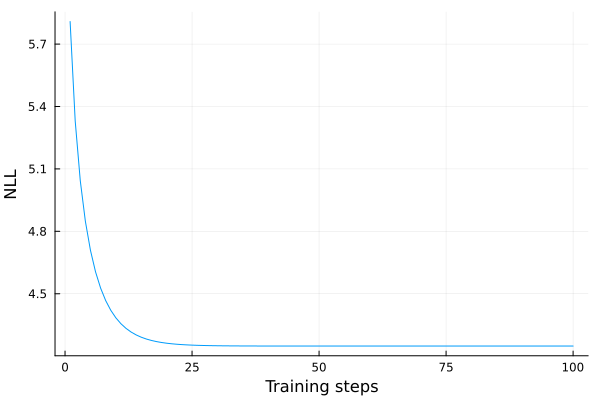

In [6]:
#Pkg.add("Plots")
using Plots
plot(nll_vector)
plot!(xlabel="Training steps")
plot!(ylabel="NLL")
plot!(legend=false)

This is the expected NLL loss function value for the cardinality dataset, with value $$\log \binom{8}{4} \approx 4.25.$$

Next we confirm that the amplitudes for each valid bitstring (of valid cardinality) are indeed all equal. For comparison we also show the amplitudes of the initial mps, showing that indeed the mps was able to learn the target distribution.

In [7]:
contracted_mps = mps[1] * mps[2] * mps[3] * mps[4] * mps[5] * mps[6] * mps[7] * mps[8]
contracted_mps_ini = mps_ini[1] * mps_ini[2] * mps_ini[3] * mps_ini[4] * mps_ini[5] * mps_ini[6] * mps_ini[7] * mps_ini[8]
loss_ll = 0
count1 = 0 
count2 = 0
for j1 in 0:1 
    for j2 in 0:1 
        for j3 in 0:1 
            for j4 in 0:1 
                for j5 in 0:1 
                    for j6 in 0:1 
                        for j7 in 0:1
                            for j8 in 0:1
                                i1=j1+1; i2=j2+1; i3=j3+1; i4=j4+1; i5=j5+1; i6=j6+1; i7=j7+1; i8=j8+1;
                                if contracted_mps[i1,i2,i3,i4,i5,i6,i7,i8] != 0 
                                    global sol = (j1,j2,j3,j4,j5,j6,j7,j8) 
                                    #@show contracted_mps
                                    @show sol
                                    @show (contracted_mps[i1,i2,i3,i4,i5,i6,i7,i8])^2
                                    @show (contracted_mps_ini[i1,i2,i3,i4,i5,i6,i7,i8])^2
                                    global loss_ll += log((contracted_mps[i1,i2,i3,i4,i5,i6,i7,i8])^2)
                                end
                            end
                        end
                    end 
                end
            end 
        end 
    end 
end

sol = (0, 0, 0, 0, 1, 1, 1, 1)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.014285937265913217
contracted_mps_ini[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.00026218410820454943
sol = (0, 0, 0, 1, 0, 1, 1, 1)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.014285029597814124
contracted_mps_ini[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.015476159544437458
sol = (0, 0, 0, 1, 1, 0, 1, 1)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.0142852197639178
contracted_mps_ini[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.0018609468166717318
sol = (0, 0, 0, 1, 1, 1, 0, 1)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.0142857017235465
contracted_mps_ini[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 3.0561751784010615e-8
sol = (0, 0, 0, 1, 1, 1, 1, 0)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.014285144427589084
contracted_mps_ini[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.00025334868245432534
sol = (0, 0, 1, 0, 0, 1, 1, 1)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 =

# Inequality 

Next we check that the learning algorithm also applies for datasets formed by bitstrings obeying inequality constraints. In this case we consider two arbitrary inequalities, compute its solutions by hand, and train an mps to produce all these samples with equal probability. 

In [10]:
N = 8
m = 2
A = [2   0   2  1  -2  -2  -2  0
1  -1  -2  0   2   1   0  1]
boundary_terms = [0, -1, 0, 0]
lb = [0; -1]
ub = [0; 0]
flux_mps = QRegion([Box(lb,ub)])

mps, link_inds_backward, link_inds_forward = constraints_to_mps(A, lb, ub; verbose=false, flux_center=1, block_dim=1, ensemble_entries="random")
normalize!(mps)

constrained_orthogonalize!(mps, 1; left_canonical_indices=link_inds_forward, right_canonical_indices=link_inds_backward,flux_mps=flux_mps)
mps_ini = copy(mps);

n_valid = 0
seed_samples = Vector{Vector{Int}}()
for i in 1:2^N
    bs = Vector{Int}(ind2state(i, N))
    if all(lb .<= A * bs .<= ub)
        push!(seed_samples, bs)
        global n_valid += 1
    end
end

num_train_samples = Int(n_valid)
training_samples = Matrix{Int}(undef, num_train_samples, N)
for i in 1:num_train_samples
    training_samples[i,:] = seed_samples[i]
end


learning_rate = Float32(1E-2)
num_training_steps = 100
max_bond_dim = 8
train_params = TrainParams(learning_rate, num_training_steps, max_bond_dim)

is = ((dim=2|id=516) <In>
 1: QN(("q1",0),("q2",0)) => 1
 2: QN(("q1",0),("q2",-1)) => 1, (dim=5|id=383) <In>
 1: QRegion([Box([0, 0], [0, 0])]) => 1
 2: QRegion([Box([0, -1], [0, -1])]) => 1
 3: QRegion([Box([-2, 0], [-2, 0])]) => 1
 4: QRegion([Box([-2, -1], [-2, -1])]) => 1
 5: QRegion([Box([0, 1], [0, 1])]) => 1, (dim=2|id=141) <Out>
 1: QRegion([Box([0, -1], [0, 0])]) => 1
 2: QRegion([Box([-2, -2], [-2, -1])]) => 1)
is = ((dim=2|id=932) <In>
 1: QN(("q1",0),("q2",0)) => 1
 2: QN(("q1",2),("q2",-2)) => 1, (dim=8|id=843) <In>
 1: QRegion([Box([0, 0], [0, 0])]) => 1
 2: QRegion([Box([-2, 2], [-2, 2])]) => 1
 3: QRegion([Box([-2, 1], [-2, 1])]) => 1
 4: QRegion([Box([-2, 0], [-2, 0])]) => 1
 5: QRegion([Box([-4, 2], [-4, 2])]) => 1
 6: QRegion([Box([-4, 1], [-4, 1])]) => 1
 7: QRegion([Box([0, 1], [0, 1])]) => 1
 8: QRegion([Box([-2, 3], [-2, 3])]) => 1, (dim=5|id=383) <Out>
 1: QRegion([Box([0, 0], [0, 0])]) => 1
 2: QRegion([Box([0, -1], [0, -1])]) => 1
 3: QRegion([Box([-2, 0], [-

TrainParams(0.01f0, 100, 8.0f0)

In [11]:
nll_vector, mps = training(train_params, mps, training_samples; left_canonical_indices=link_inds_forward, right_canonical_indices=link_inds_backward, flux_mps=flux_mps);

Let's plot the training curve.

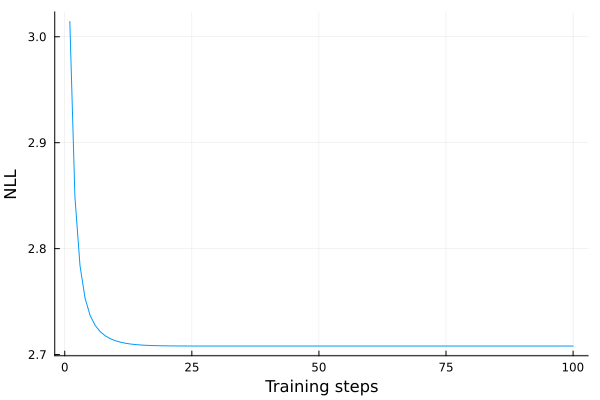

In [12]:
plot(nll_vector)
plot!(xlabel="Training steps")
plot!(ylabel="NLL")
plot!(legend=false)

We see that the final NLL is close to the target one, corresponding to $$\log(15) \approx 2.71,$$ since there are 15 solutions to the above set of inequalities.

Let's now confirm that all amplitudes are equally probable, and compare against the untrained mps amplitudes.

In [13]:
contracted_mps = mps[1] * mps[2] * mps[3] * mps[4] * mps[5] * mps[6] * mps[7] * mps[8]
contracted_mps_ini = mps_ini[1] * mps_ini[2] * mps_ini[3] * mps_ini[4] * mps_ini[5] * mps_ini[6] * mps_ini[7] * mps_ini[8]
loss_ll = 0
count1 = 0 
count2 = 0
for j1 in 0:1 
    for j2 in 0:1 
        for j3 in 0:1 
            for j4 in 0:1 
                for j5 in 0:1 
                    for j6 in 0:1 
                        for j7 in 0:1
                            for j8 in 0:1
                                i1=j1+1; i2=j2+1; i3=j3+1; i4=j4+1; i5=j5+1; i6=j6+1; i7=j7+1; i8=j8+1;
                                if contracted_mps[i1,i2,i3,i4,i5,i6,i7,i8] != 0 
                                    global sol = (j1,j2,j3,j4,j5,j6,j7,j8) 
                                    #@show contracted_mps
                                    @show sol
                                    @show (contracted_mps[i1,i2,i3,i4,i5,i6,i7,i8])^2
                                    @show (contracted_mps_ini[i1,i2,i3,i4,i5,i6,i7,i8])^2
                                    global loss_ll += log((contracted_mps[i1,i2,i3,i4,i5,i6,i7,i8])^2)
                                end
                            end
                        end
                    end 
                end
            end 
        end 
    end 
end

sol = (0, 0, 0, 0, 0, 0, 0, 0)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.06666666674399521
contracted_mps_ini[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 1.1110077168037054e-6
sol = (0, 0, 1, 0, 0, 0, 1, 1)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.06666666716668315
contracted_mps_ini[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.2558959897414673
sol = (0, 0, 1, 0, 0, 1, 0, 0)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.06666666614740302
contracted_mps_ini[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 7.635060314499772e-5
sol = (0, 0, 1, 0, 0, 1, 0, 1)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.06666666661940074
contracted_mps_ini[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.00011557267893595715
sol = (0, 0, 1, 0, 1, 0, 0, 0)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.06666666674399546
contracted_mps_ini[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 6.949016861505351e-7
sol = (0, 1, 0, 0, 0, 0, 0, 0)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.066

Next, we show that we can also learn biases in a constrained dataset by simply increasing the size of each tensor block. We simply consider a specific cardinality dataset with some repeated samples and aim to learn the underlying distribution. We set the maximum size of each to be 3

In [17]:
Random.seed!(1)
N = 8
m = 1
A = ones(Int, 1, N)
lb = [4] # lower bound
ub = [4] # upper bound
flux_mps = QRegion([Box(lb,ub)])

n_valid = 0
seed_samples = Vector{Vector{Int}}()
for i in 1:2^N
    bs = Vector{Int}(ind2state(i, N))
    if sum(bs) == 4
        push!(seed_samples, bs)
        global n_valid += 1
    end
end


num_train_samples = Int(0.5*n_valid)
training_samples = Matrix{Int}(undef, num_train_samples, N)
for i in 1:num_train_samples
    training_samples[i,:] = seed_samples[rand(1:num_train_samples)]
end

mps, link_inds_backward, link_inds_forward = constraints_to_mps(A, lb, ub; verbose=false, flux_center=1, block_dim=3, ensemble_entries="random")
normalize!(mps)
constrained_orthogonalize!(mps, 1; left_canonical_indices=link_inds_forward, right_canonical_indices=link_inds_backward,flux_mps=flux_mps)
mps_ini = copy(mps);

learning_rate = Float32(1E-2)
num_training_steps = 40
max_bond_dim = 20
train_params = TrainParams(learning_rate, num_training_steps, max_bond_dim);

nll_vector, mps = training(train_params, mps, training_samples; left_canonical_indices=link_inds_forward, right_canonical_indices=link_inds_backward, flux_mps=flux_mps);

is = ((dim=2|id=485) <In>
 1: QN("q1",0) => 1
 2: QN("q1",1) => 1, (dim=9|id=718) <In>
 1: QRegion([Box([2], [2])]) => 3
 2: QRegion([Box([3], [3])]) => 3
 3: QRegion([Box([4], [4])]) => 3, (dim=6|id=502) <Out>
 1: QRegion([Box([3], [3])]) => 3
 2: QRegion([Box([4], [4])]) => 3)
is = ((dim=2|id=668) <In>
 1: QN("q1",0) => 1
 2: QN("q1",1) => 1, (dim=12|id=441) <In>
 1: QRegion([Box([1], [1])]) => 3
 2: QRegion([Box([2], [2])]) => 3
 3: QRegion([Box([3], [3])]) => 3
 4: QRegion([Box([4], [4])]) => 3, (dim=9|id=718) <Out>
 1: QRegion([Box([2], [2])]) => 3
 2: QRegion([Box([3], [3])]) => 3
 3: QRegion([Box([4], [4])]) => 3)
is = ((dim=2|id=979) <In>
 1: QN("q1",0) => 1
 2: QN("q1",1) => 1, (dim=15|id=904) <In>
 1: QRegion([Box([0], [0])]) => 3
 2: QRegion([Box([1], [1])]) => 3
 3: QRegion([Box([2], [2])]) => 3
 4: QRegion([Box([3], [3])]) => 3
 5: QRegion([Box([4], [4])]) => 3, (dim=12|id=441) <Out>
 1: QRegion([Box([1], [1])]) => 3
 2: QRegion([Box([2], [2])]) => 3
 3: QRegion([Box([3], 

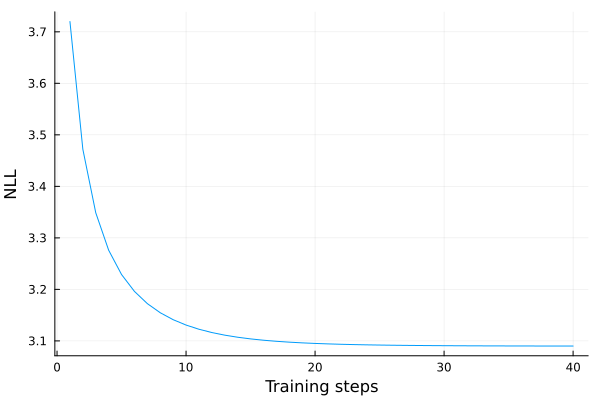

In [19]:
plot(nll_vector)
plot!(xlabel="Training steps")
plot!(ylabel="NLL")
plot!(legend=false)

In [21]:
training_samples_vec = Vector{Vector{Int}}()
for i in 1:num_train_samples 
    push!(training_samples_vec, training_samples[i,:])
end

# Function to compute the integer representation value of a boolean vector
int_value(bool_vec) = parse(Int, join(map(Int, bool_vec), ""), base=2)


# Compute the integer representation values for each boolean vector
int_values = [int_value(bool_vec) for bool_vec in training_samples_vec]

# Sort the indices of the boolean vectors based on their integer representation values
sorted_indices = sortperm(int_values)

# Reorder the rows of the matrix based on the sorted indices
sorted_matrix = training_samples[sorted_indices, :]
for i in 1:35 
    print(sorted_matrix[i,:], "\n")
    #@show sorted_indices[i]
end
#@show sorted_indices


[0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 0, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 0]
[0, 0, 1, 0, 0, 1, 1, 1]
[0, 0, 1, 0, 1, 0, 1, 1]
[0, 0, 1, 0, 1, 0, 1, 1]
[0, 0, 1, 1, 0, 0, 1, 1]
[0, 0, 1, 1, 0, 1, 0, 1]
[0, 0, 1, 1, 0, 1, 0, 1]
[0, 0, 1, 1, 1, 0, 0, 1]
[0, 0, 1, 1, 1, 0, 0, 1]
[0, 0, 1, 1, 1, 0, 1, 0]
[0, 0, 1, 1, 1, 1, 0, 0]
[0, 1, 0, 0, 0, 1, 1, 1]
[0, 1, 0, 0, 0, 1, 1, 1]
[0, 1, 0, 0, 1, 1, 0, 1]
[0, 1, 0, 1, 0, 0, 1, 1]
[0, 1, 0, 1, 0, 0, 1, 1]
[0, 1, 0, 1, 0, 0, 1, 1]
[0, 1, 0, 1, 0, 1, 1, 0]
[0, 1, 0, 1, 0, 1, 1, 0]
[0, 1, 0, 1, 0, 1, 1, 0]
[0, 1, 0, 1, 1, 0, 1, 0]
[0, 1, 0, 1, 1, 0, 1, 0]
[0, 1, 0, 1, 1, 1, 0, 0]
[0, 1, 1, 0, 0, 0, 1, 1]
[0, 1, 1, 0, 0, 1, 0, 1]
[0, 1, 1, 0, 0, 1, 1, 0]
[0, 1, 1, 0, 1, 0, 0, 1]
[0, 1, 1, 0, 1, 0, 1, 0]
[0, 1, 1, 0, 1, 1, 0, 0]
[0, 1, 1, 0, 1, 1, 0, 0]
[0, 1, 1, 1, 0, 0, 0, 1]
[0, 1, 1, 1, 0, 0, 1, 0]


We can compare the final loss against the theoretical value for this example finding good agreement

In [20]:
target_loss = -(15/35*log(1/35)+2/35*log(2/35)*7+3/35*log(3/35)*2)
@show target_loss
@show nll_vector[end]

target_loss = 3.0897556540651885
nll_vector[end] = 3.0899661041783015


3.0899661041783015

In [22]:
contracted_mps = mps[1] * mps[2] * mps[3] * mps[4] * mps[5] * mps[6] * mps[7] * mps[8]
contracted_mps_ini = mps_ini[1] * mps_ini[2] * mps_ini[3] * mps_ini[4] * mps_ini[5] * mps_ini[6] * mps_ini[7] * mps_ini[8]
loss_ll = 0
count1 = 0 
count2 = 0
for j1 in 0:1 
    for j2 in 0:1 
        for j3 in 0:1 
            for j4 in 0:1 
                for j5 in 0:1 
                    for j6 in 0:1 
                        for j7 in 0:1
                            for j8 in 0:1
                                i1=j1+1; i2=j2+1; i3=j3+1; i4=j4+1; i5=j5+1; i6=j6+1; i7=j7+1; i8=j8+1;
                                if contracted_mps[i1,i2,i3,i4,i5,i6,i7,i8] != 0 
                                    global sol = (j1,j2,j3,j4,j5,j6,j7,j8) 
                                    #@show contracted_mps
                                    @show sol
                                    @show (contracted_mps[i1,i2,i3,i4,i5,i6,i7,i8])^2
                                    @show (contracted_mps_ini[i1,i2,i3,i4,i5,i6,i7,i8])^2
                                    global loss_ll += log((contracted_mps[i1,i2,i3,i4,i5,i6,i7,i8])^2)
                                end
                            end
                        end
                    end 
                end
            end 
        end 
    end 
end

sol = (0, 0, 0, 0, 1, 1, 1, 1)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.05709793616631148
contracted_mps_ini[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.003941364164679351
sol = (0, 0, 0, 1, 0, 1, 1, 1)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 5.479228506743653e-9
contracted_mps_ini[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.002928452722534938
sol = (0, 0, 0, 1, 1, 0, 1, 1)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.028837254161683812
contracted_mps_ini[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.0017449732740318176
sol = (0, 0, 0, 1, 1, 1, 0, 1)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.0001001994679340096
contracted_mps_ini[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.015774495700693805
sol = (0, 0, 0, 1, 1, 1, 1, 0)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.028343479839345202
contracted_mps_ini[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.10978298120966296
sol = (0, 0, 1, 0, 0, 1, 1, 1)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0